<a href="https://colab.research.google.com/github/jeffbgreene/geology-558/blob/main/Supervised_Classification_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**<h1 style="text-align:center;"> Supervised Classification EDA - Apollo Mission Moon Sample Return Mineral Analysis</h1>**

#### Author: Jeff Greene
#### Date : 1/26/2025





### **Lunar Sample Analysis**
The data analyzed in this notebook was retrieved from the website [Astromat](https://search.astromat.org/?eventId=3407). The data is a summary of chemical analysis performed on returned samples from Apollo 11, 12, 14, 15, 16 and 17. For reference, I have included a visual representation of the landing locations of each of these missions.

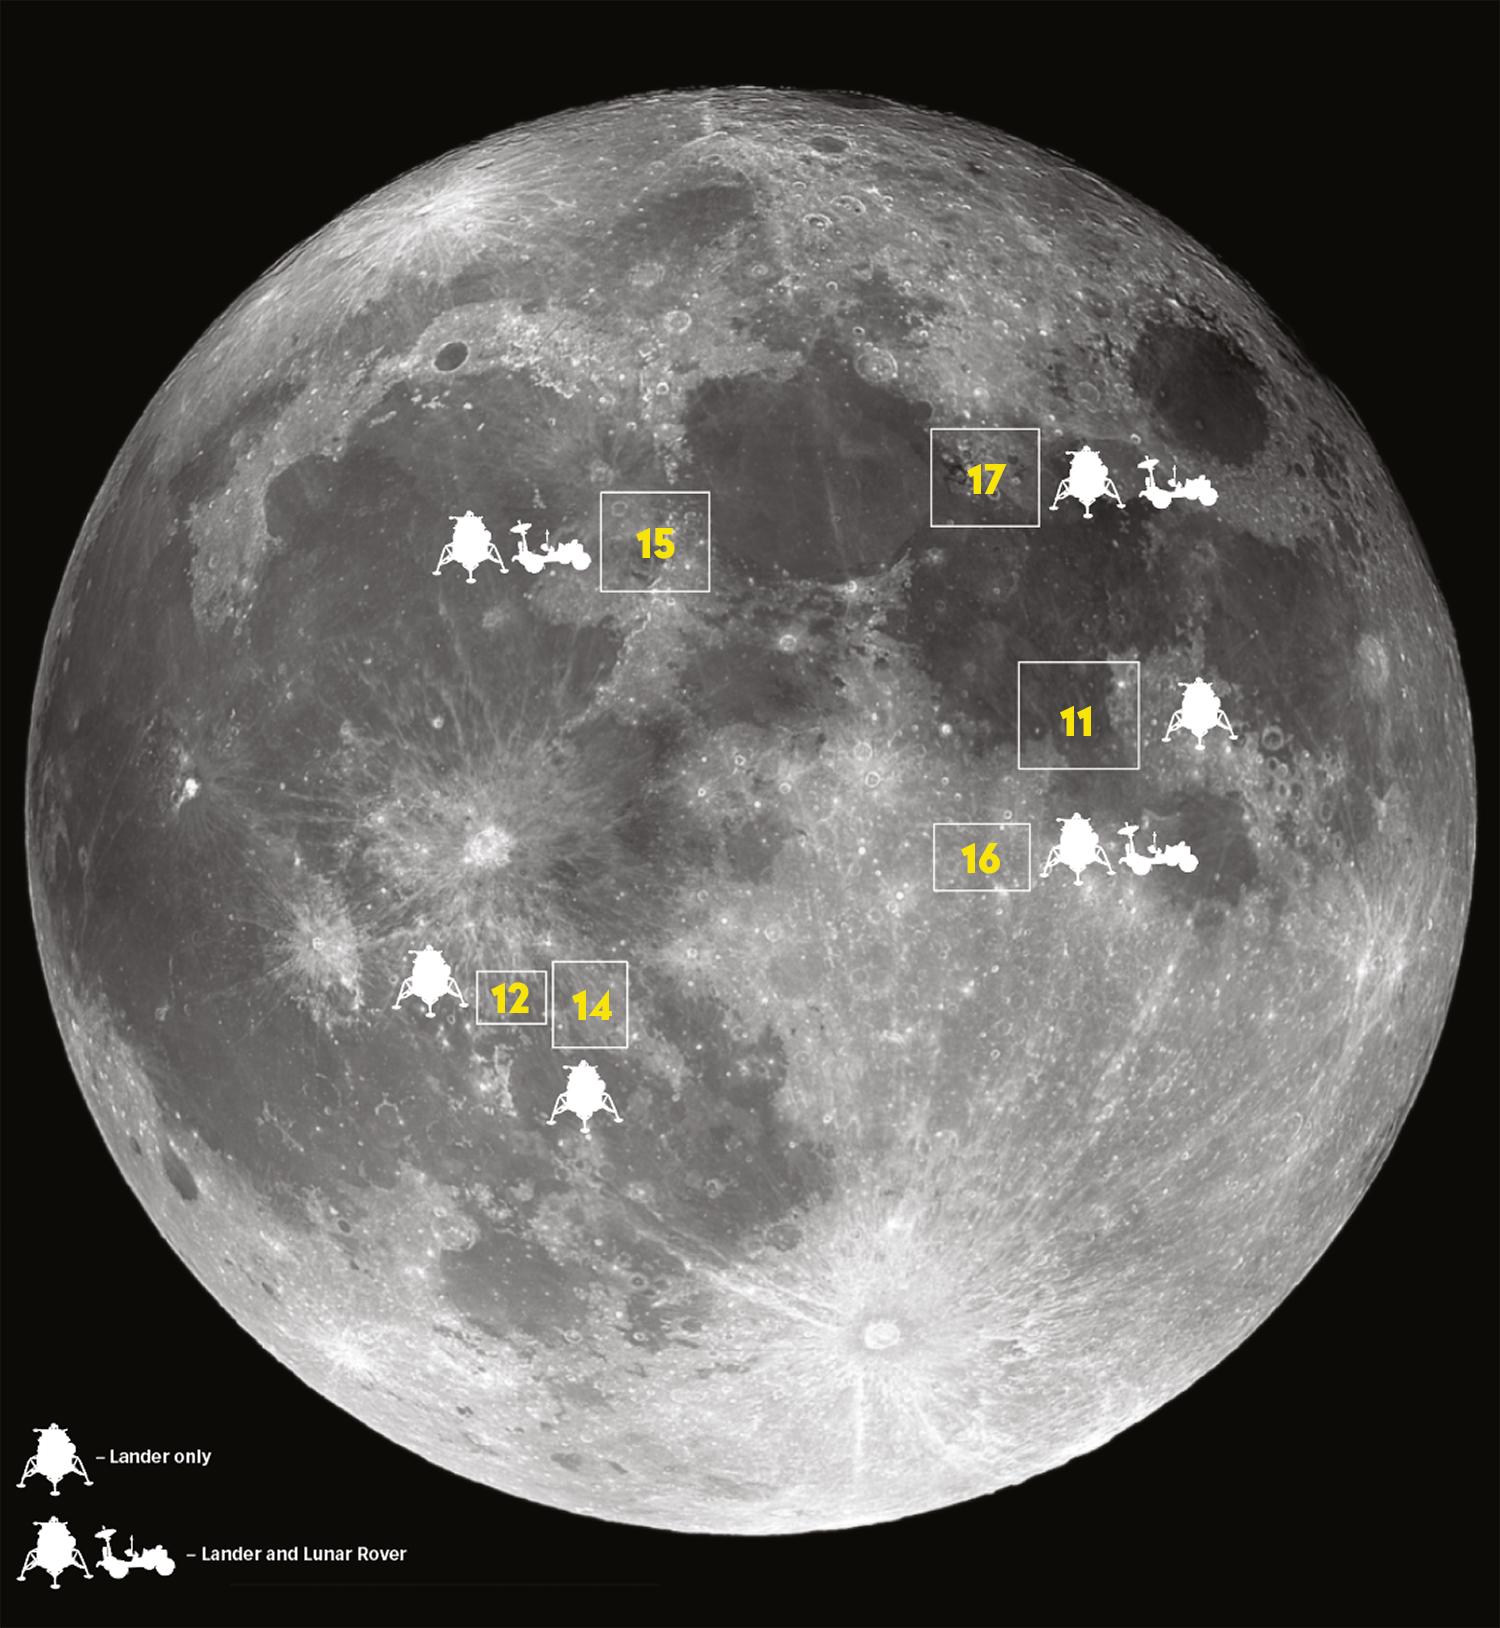



### <p style="text-align:center;"><i>Figure 1: Apollo Landing sites where Lunar samples were collected.</i></p>

## Data set and EDA Goal


---


The data consists of assorted caterogorical and numerical features. Numeric values for chemical compositions in the data were derived ysubg electron probe micro-analyzer (EMPA), although there may be other techniques that were applied depending on what lab was performing the analysis.

The **goal** of my analysis was to wrangle and clean the dataset, apply exploratory data analysis and then determine the features and classes that I would like to apply classification algorithms to in the follow-on assignment.

In [1]:
# Pip install this libray on the first run
!pip install -U mpltern

# These libraries are used for reading in multiple files
import glob
import os

import pandas as pd
import numpy as np
import math

from sklearn.impute import SimpleImputer

# Plotting libraries
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import seaborn as sns
import scipy.stats as stats
from scipy.stats import pearsonr

import mpltern

# Set the figure size
plt.rcParams["figure.figsize"] = (19,19)
# Set the default font size
plt.rcParams.update({'font.size': 15})

## Data Cleaning

---



### &emsp; The data wrangling process included reading in the CSV file that were retrieved from AstroMat.org. After reading in the file and analyzing the columns, there was a fair amount of information, such as metadata associated with the samples that did not seem important to the analyis, so I removed those columns. I also decided to use the weight percentage values for the oxides, as there were many more of these values in the dataset. Below is the code I used to wrangle and clean the data. I have some comments in the form of Markdown below certain cells to explain my thought process.

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/jeffbgreene/geology-558/main/lunar_data.csv', index_col=None, header=0)

<ipython-input-2-578ed51170a0>:1: DtypeWarning: Columns (13,19,20,22,23,25,26,28,29,31,32,34,35,37,38,40,41,43,44,46,47,55,56,58,59,70,71,73,74,82,83,85,86,88,89,91,92,94,95,97,98,100,101,103,104,106,107,109,110,112,113,115,116,118,119,121,122,124,125,127,128,130,131,133,134,136,137,138,139,140,141,142,148,169) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('https://raw.githubusercontent.com/jeffbgreene/geology-558/main/lunar_data.csv', index_col=None, header=0)


In [3]:
df.head()

,Sample,Sample URL,Dataset,Dataset URL,Citation,Citation URL,Collection,Data Source,Analysis Type,Analyzed Material,...,Cr2O3 (wt%) Method,MnO (wt%),MnO (wt%) Lab,MnO (wt%) Method,Na2O (wt%),Na2O (wt%) Lab,Na2O (wt%) Method,TOTAL (wt%),TOTAL (wt%) Lab,TOTAL (wt%) Method
0,"74241,54",https://page.astromat.org/sample/UtrVlnQBpybrw...,MICROPROBE ANALYSES OF APOLLO 17 ILMENITES AND...,https://page.astromat.org/citation/IA7qUHUBT57...,"TAYLOR,1973",https://page.astromat.org/citation/IA7qUHUBT57...,NaN,Astromat,Mineral Analysis,MINERAL,...,EMP,0.45,UNKNOWN,EMP,NaN,NaN,NaN,NaN,NaN,NaN
1,"74241,54",https://page.astromat.org/sample/UtrVlnQBpybrw...,MICROPROBE ANALYSES OF ORTHO-ARMALCOLITES,https://page.astromat.org/citation/IA7qUHUBT57...,"TAYLOR,1973",https://page.astromat.org/citation/IA7qUHUBT57...,NaN,Astromat,Mineral Analysis,MINERAL,...,EMP,0.11,UNKNOWN,EMP,NaN,NaN,NaN,NaN,NaN,NaN
2,"74243,2,17",https://page.astromat.org/sample/mdlQlnQBpybrw...,PYROXENE CHEMISTRY,https://page.astromat.org/citation/LA7oUHUBT57...,"PAPIKE,1974",https://page.astromat.org/citation/LA7oUHUBT57...,NaN,Astromat,Mineral Analysis,MINERAL,...,EMP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"74243,2,17",https://page.astromat.org/sample/mdlQlnQBpybrw...,PYROXENE CHEMISTRY,https://page.astromat.org/citation/LA7oUHUBT57...,"PAPIKE,1974",https://page.astromat.org/citation/LA7oUHUBT57...,NaN,Astromat,Mineral Analysis,MINERAL,...,EMP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"74243,2,17",https://page.astromat.org/sample/mdlQlnQBpybrw...,PYROXENE CHEMISTRY,https://page.astromat.org/citation/LA7oUHUBT57...,"PAPIKE,1974",https://page.astromat.org/citation/LA7oUHUBT57...,NaN,Astromat,Mineral Analysis,MINERAL,...,EMP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83827 entries, 0 to 83826
Columns: 172 entries, Sample to TOTAL (wt%) Method
dtypes: float64(49), object(123)
memory usage: 110.0+ MB


### &emsp; There is a fair amount of metadata included such as the Lab where the analysis was performed, the Method used for the analysis, and several other columns that will not be important for statistical analysis. There are also columns with almost no rows that I will drop.

In [5]:
# Filter the Dataframe on columns with unecessary values and then drop the list of columns built up by the filter method
df = df[df.columns.drop(list(df.filter(regex=r'(Lab|Method|1S|2S|mol%|AGE|Si|Replicates)')))]
df = df.drop(['Sample','Sample URL', 'Spot Id', 'Dataset', 'Dataset URL', 'Citation', 'Citation URL', 'Data Source', 'Collection', 'Analysis Type', 'Analyzed Material', 'Analysis Comment', 'Calc Avg'], axis=1)
# Drop all columns where there are 0 values
df.dropna(thresh= 11, axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83827 entries, 0 to 83826
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Mineral           83827 non-null  object 
 1   ANORTHITE (vol%)  5605 non-null   float64
 2   ANORTHITE (wt%)   5605 non-null   float64
 3   ALBITE (wt%)      5003 non-null   float64
 4   ORTHOCLASE (wt%)  4761 non-null   float64
 5   FORSTERITE (wt%)  5149 non-null   float64
 6   FAYALITE (wt%)    4484 non-null   float64
 7   Fe (wt%)          12571 non-null  float64
 8   Fe (ppm)          12571 non-null  float64
 9   FeO (wt%)         64011 non-null  object 
 10  CaO (wt%)         63871 non-null  float64
 11  MgO (wt%)         63997 non-null  object 
 12  Al2O3 (wt%)       55799 non-null  float64
 13  TiO2 (wt%)        47318 non-null  float64
 14  Cr2O3 (wt%)       48763 non-null  float64
 15  MnO (wt%)         49371 non-null  float64
 16  Na2O (wt%)        37581 non-null  float6

### &emsp;  There are now 14 columns instead or 172. This is way better than the original dataset read in, but could still use more cleaning. I am not really interested in the weight percentage of the Iron, as all other features are given as oxides, so I will drop the columns with Fe wt% and ppm as well as ANORTHITE vol%.

In [6]:
df = df.drop(['Fe (wt%)', 'Fe (ppm)', 'ANORTHITE (vol%)'], axis=1)

### I know all my numeric values that are left are weight percents, so I'll remove wt% from the column headers. I also don't need the named mineral features, so I will remove those as well. FeO, MgO and Total have data types of object, so those need to be converted to float64. However, before I can convert the FeO data, I have to do a string replace, as the data has commas instead of decimal points.

In [7]:
# Remove the "wt%" from each of the columns that I kept, as I know the units
df.columns = df.columns.str.replace(' (wt%)', '')
# Drop the last of the columns
df = df.drop(['ANORTHITE','ALBITE','ORTHOCLASE','FORSTERITE','FAYALITE', 'TOTAL'], axis=1)
# Replace commas with periods in the data
df.replace(',', '.', regex=True, inplace=True)
# Cast the object columns to floats
df = df.astype({'FeO': 'float', 'MgO': 'float'})

In [8]:
# Determine the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83827 entries, 0 to 83826
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Mineral  83827 non-null  object 
 1   FeO      64011 non-null  float64
 2   CaO      63871 non-null  float64
 3   MgO      63997 non-null  float64
 4   Al2O3    55799 non-null  float64
 5   TiO2     47318 non-null  float64
 6   Cr2O3    48763 non-null  float64
 7   MnO      49371 non-null  float64
 8   Na2O     37581 non-null  float64
dtypes: float64(8), object(1)
memory usage: 5.8+ MB


In [9]:
# Sanity check to ensure that the columns I wanted to keep are in he frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83827 entries, 0 to 83826
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Mineral  83827 non-null  object 
 1   FeO      64011 non-null  float64
 2   CaO      63871 non-null  float64
 3   MgO      63997 non-null  float64
 4   Al2O3    55799 non-null  float64
 5   TiO2     47318 non-null  float64
 6   Cr2O3    48763 non-null  float64
 7   MnO      49371 non-null  float64
 8   Na2O     37581 non-null  float64
dtypes: float64(8), object(1)
memory usage: 5.8+ MB


### &emsp; As this data was retrieved from Astromat, it is a collection of synthesized geochemical data preformed on samples returned from Ryugu. Now that the number columns has been reduced to something manageable, the Mineral column may be a good starting point to begin analysis of what is in the retrieved dataset

In [10]:
counts = df.Mineral.value_counts()
print(counts)

Mineral
OLIVINE                      19911
PYROXENE (NOT CLASSIFIED)    15550
PLAGIOCLASE                   9595
INDETERMINATE                 6248
SPINEL                        3546
                             ...  
CHLORO-FLUORITE                  1
GROUNDMASS-PYROXENE              1
GROUNDMASS PLAGIOCLASE           1
INTERMEDIATE OLIVINE             1
CLAY                             1
Name: count, Length: 100, dtype: int64


### &emsp; I filtered the data to keep the Minerals that have more than 1500 samples

In [11]:
df_filtered = df[df['Mineral'].isin(counts[counts > 600].index)]
df_filtered.Mineral.value_counts()

,count
Mineral,
OLIVINE,19911
PYROXENE (NOT CLASSIFIED),15550
PLAGIOCLASE,9595
INDETERMINATE,6248
SPINEL,3546
ILMENITE,2510
GLASS,2298
CLINOPYROXENE,2157
FENI METAL,1831


In [12]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 76648 entries, 0 to 83826
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Mineral  76648 non-null  object 
 1   FeO      60128 non-null  float64
 2   CaO      60309 non-null  float64
 3   MgO      60285 non-null  float64
 4   Al2O3    52236 non-null  float64
 5   TiO2     44034 non-null  float64
 6   Cr2O3    45955 non-null  float64
 7   MnO      46595 non-null  float64
 8   Na2O     35819 non-null  float64
dtypes: float64(8), object(1)
memory usage: 5.8+ MB


In [13]:
# The Ferrous Nickle Metal records have no Na2O values, so they will break the imputation code.
# Because of this, I removed those rows
df_filtered = df_filtered.loc[df_filtered['Mineral'] != 'FENI METAL']
df_filtered['Mineral'] = df_filtered['Mineral'].str.replace('PYROXENE (NOT CLASSIFIED)', 'PYROXENE')
df_filtered = df_filtered.loc[df_filtered['Mineral'] != 'PYROXENE']
df_filtered = df_filtered.loc[df_filtered['Mineral'] != 'CLINOPYROXENE']
df_filtered = df_filtered.loc[df_filtered['Mineral'] != 'LOW-CA PYROXENE']
df_filtered = df_filtered.loc[df_filtered['Mineral'] != 'HIGH-CA PYROXENE']

In [14]:
#df_filtered = df_filtered.loc[df_filtered['Mineral'] != 'FELDSPAR']

In [15]:
#Rename the Pyroxene column
'''
df_filtered['Mineral'] = df_filtered['Mineral'].str.replace('CLINOPYROXENE', 'PYROXENE')
df_filtered['Mineral'] = df_filtered['Mineral'].str.replace('LOW-CA PYROXENE', 'PYROXENE')
df_filtered['Mineral'] = df_filtered['Mineral'].str.replace('ORTHOPYROXENE', 'PYROXENE')
df_filtered['Mineral'] = df_filtered['Mineral'].str.replace('HIGH-CA PYROXENE', 'PYROXENE')

'''
df_filtered['Mineral'] = df_filtered['Mineral'].str.replace('PLAGIOCLASE', 'FELDSPAR')
df_filtered['Mineral'] = df_filtered['Mineral'].str.replace('MASKELYNITE', 'FELDSPAR')

### Orginally I was going to fill the NAN's with 0's, but that appeared to heavily skew the data. Instead I performed data imputation before attempting to further explore this data

In [16]:
# Function to impute missing values for each class
def impute_by_class(df, class_column, strategy='mean'):
    imputed_dfs = []
    for class_value in df[class_column].unique():
        class_df = df[df[class_column] == class_value]
        imputer = SimpleImputer(strategy=strategy)
        imputed_values = imputer.fit_transform(class_df.drop(columns=[class_column]))
        imputed_class_df = pd.DataFrame(imputed_values, columns=class_df.columns.drop(class_column))
        imputed_class_df[class_column] = class_value
        imputed_dfs.append(imputed_class_df)
    return pd.concat(imputed_dfs).reset_index(drop=True)

# Impute missing values
df_filtered = impute_by_class(df_filtered, 'Mineral')


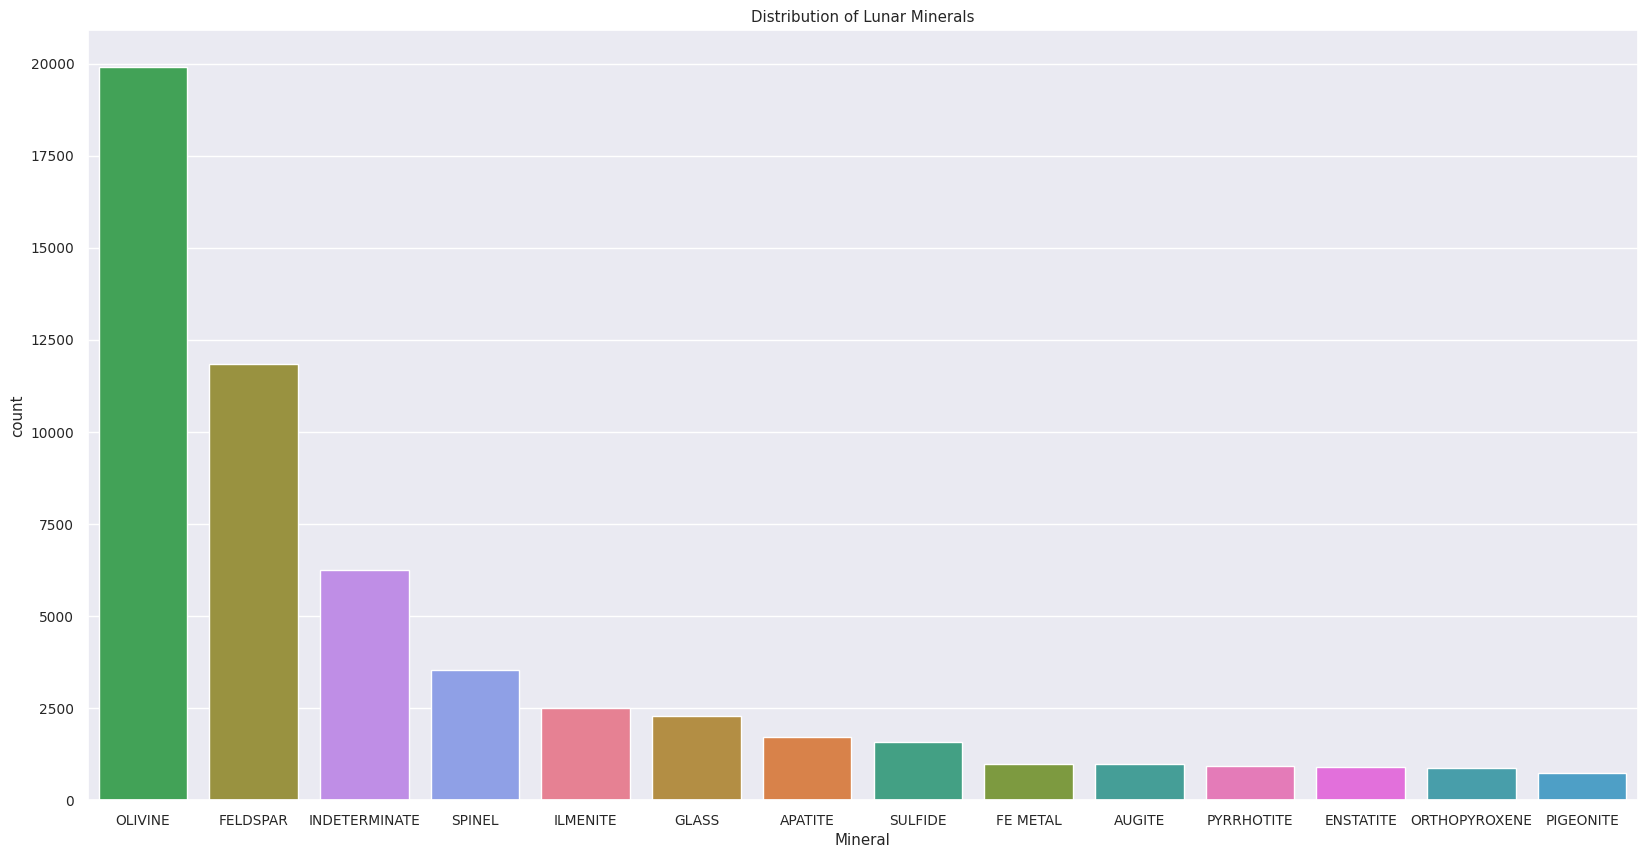

In [17]:
# Create a histogram to show mineral classes
sns.set_theme(rc={'figure.figsize':(20,10)})
sns.set(font_scale=.9)
sns.countplot(x='Mineral', data=df_filtered, order=df_filtered['Mineral'].value_counts().index, hue='Mineral')
plt.title('Distribution of Lunar Minerals')
plt.show()

### <p style="text-align:center;"><i>Figure 2: Histogram distribution of 11 major mineral types in the Lunar samples.</i></p>

### As can be seen in the plot above, and the previous value count output, there is a definite class imbalance. Before performing classification, I will need to determine a technique to mitigate this

In [18]:
# Calculate the average for the compound samples for each mineral group
grouped_df = df_filtered.groupby('Mineral', as_index=False).mean()
grouped_df.reset_index().rename(columns={df.index.name:'Mineral'})
grouped_df.head(12)

,Mineral,FeO,CaO,MgO,Al2O3,TiO2,Cr2O3,MnO,Na2O
0,APATITE,0.860828,53.072376,0.395043,0.412164,0.150965,4.057895,0.106683,0.202216
1,AUGITE,14.702427,17.297924,13.856324,1.775306,0.803850,0.558252,0.371023,0.193581
2,ENSTATITE,1.635752,0.525831,38.280000,0.412358,0.098411,0.307095,0.145939,0.035901
3,FE METAL,86.378077,0.175000,2.759167,1.147143,0.087500,3.992857,0.202857,0.395000
4,FELDSPAR,0.697258,16.531239,0.644126,32.345551,0.097003,0.069978,0.144251,1.783329
5,GLASS,12.634243,7.292437,11.242158,11.861513,1.642297,0.413575,0.382472,1.246947
6,ILMENITE,42.671819,0.341816,2.143295,0.473015,51.568337,0.635607,0.816533,0.030027
7,INDETERMINATE,28.226059,7.541215,17.556251,3.378522,0.959606,0.485731,0.715772,0.510437
8,OLIVINE,24.485566,0.971537,36.274956,0.737550,0.823440,0.639113,3.852409,0.202151
9,ORTHOPYROXENE,15.664333,1.586868,26.148409,0.818363,0.230953,0.517734,0.501800,0.058874


In [19]:

grouped_df = grouped_df[grouped_df[['Mineral']].all(axis=1)]

In [20]:
# Sanity check to ensure glass and pyrrhotite were removed
grouped_df.head(12)

,Mineral,FeO,CaO,MgO,Al2O3,TiO2,Cr2O3,MnO,Na2O
0,APATITE,0.860828,53.072376,0.395043,0.412164,0.150965,4.057895,0.106683,0.202216
1,AUGITE,14.702427,17.297924,13.856324,1.775306,0.803850,0.558252,0.371023,0.193581
2,ENSTATITE,1.635752,0.525831,38.280000,0.412358,0.098411,0.307095,0.145939,0.035901
3,FE METAL,86.378077,0.175000,2.759167,1.147143,0.087500,3.992857,0.202857,0.395000
4,FELDSPAR,0.697258,16.531239,0.644126,32.345551,0.097003,0.069978,0.144251,1.783329
5,GLASS,12.634243,7.292437,11.242158,11.861513,1.642297,0.413575,0.382472,1.246947
6,ILMENITE,42.671819,0.341816,2.143295,0.473015,51.568337,0.635607,0.816533,0.030027
7,INDETERMINATE,28.226059,7.541215,17.556251,3.378522,0.959606,0.485731,0.715772,0.510437
8,OLIVINE,24.485566,0.971537,36.274956,0.737550,0.823440,0.639113,3.852409,0.202151
9,ORTHOPYROXENE,15.664333,1.586868,26.148409,0.818363,0.230953,0.517734,0.501800,0.058874


###  &emsp;I used a stacked bar plots to compare the 3 dominant oxides for each mineral. Next I plotted histograms of each oxides across the various mineral groups to determine what trends I could see. Last, I focoused on the 3 primary oxides in olivine, pyroxene and plagioclase using binned ternary plots to see what the distribution amongst all samples for that group looked like.

In [21]:
# Step 1: Extract sample names some sums of row values can be performed
sample_names_op = grouped_df['Mineral']

df_compositions_op = grouped_df.drop(columns=['Mineral'])
def sum_rest(row, n_largest=3):
    largest = row.nlargest(n_largest)
    return 100 - largest.sum()

# Step 2: Get the top 3 largest values
df_top3_compositions_op = df_compositions_op.apply(lambda row: row.nlargest(3), axis=1)

# Step 3: Call the function defined above to remove the top 3 values and then return the percentage of other compounds and oxides
df_top3_compositions_op['Other'] = df_compositions_op.apply(sum_rest, axis=1)

# Step 4: Add back the 'Mineral' column
df_top3_compositions_op['Mineral'] = sample_names_op

# Step 5: Set 'Mineral' as index for plotting
df_top3_compositions_op = df_top3_compositions_op.set_index('Mineral')

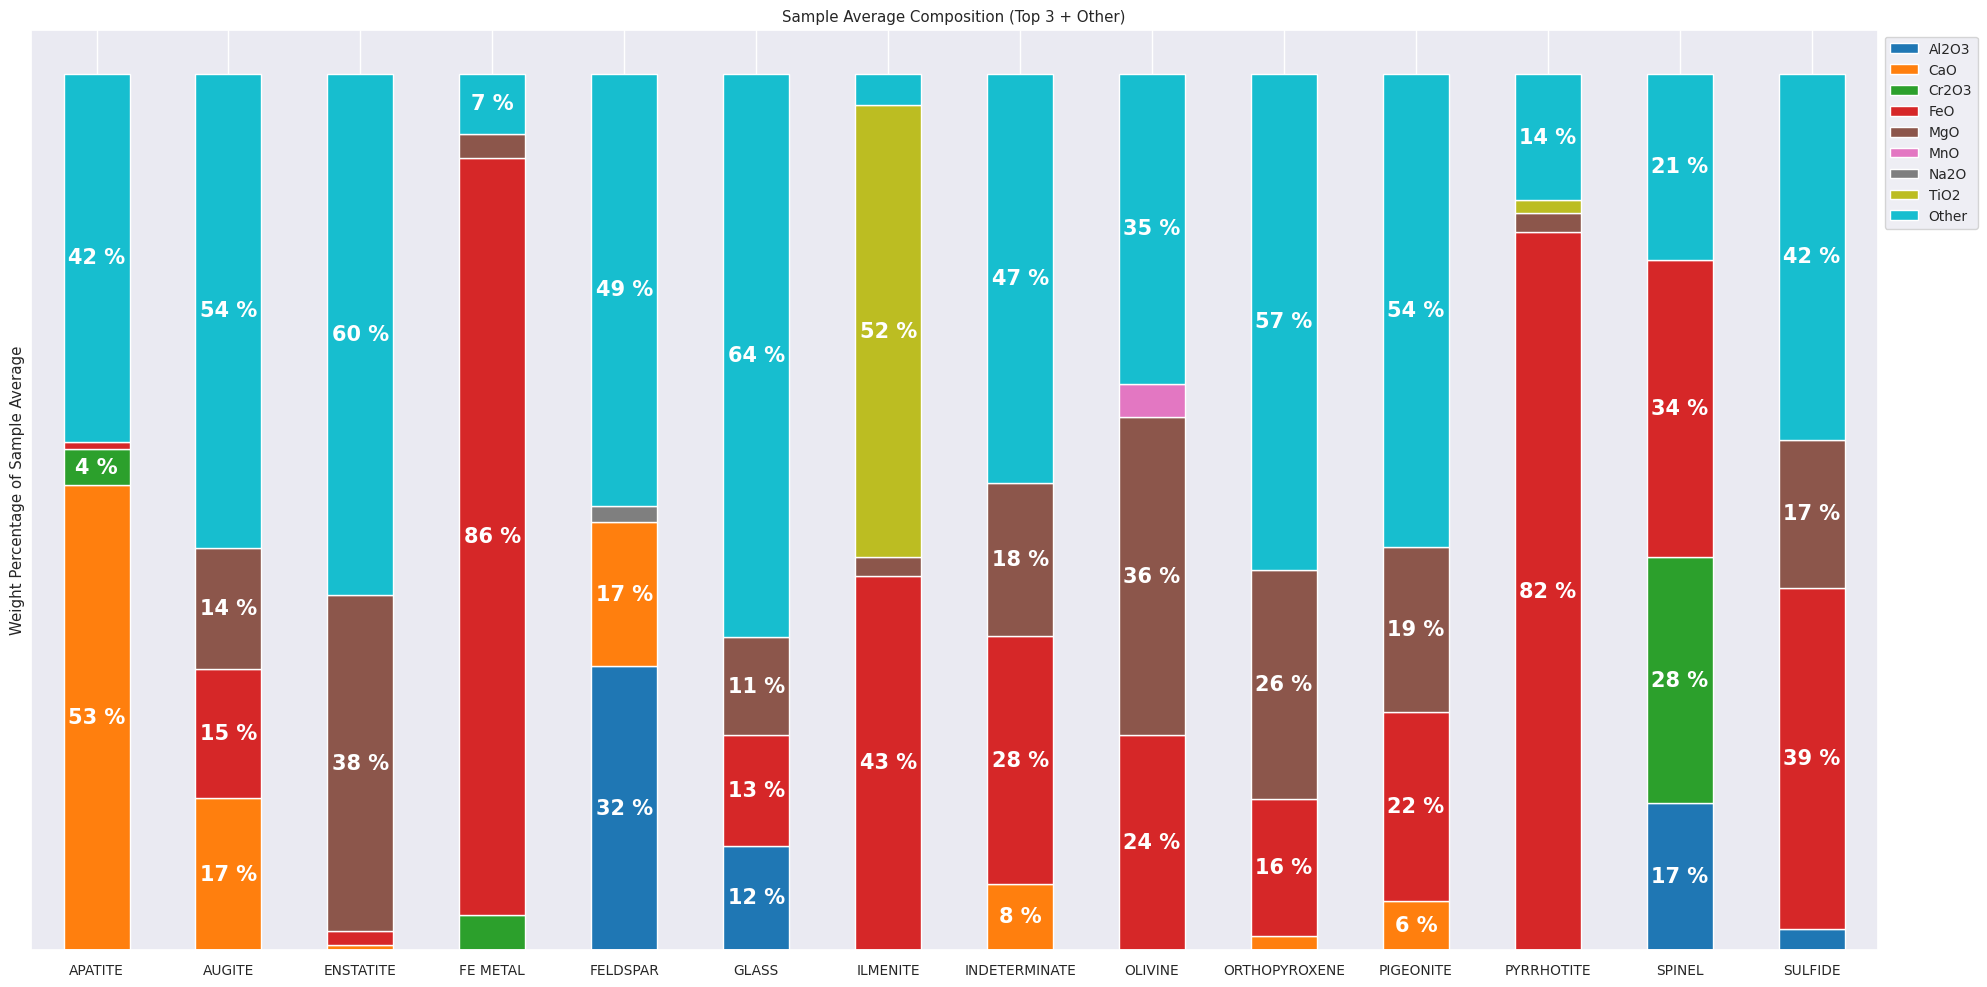

In [22]:
# Step 6: Create the plot
# Create the subplots with two axes (one for each DataFrame)
fig, axes = plt.subplots()  # 1 row, 2 columns

# Stacked bar plot for compounds/oxides
df_top3_compositions_op.plot.bar(stacked=True, ax=axes, colormap='tab10')

for rect in axes.patches:
    # Find where everything is located
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()

    # The height of the bar is the data value and can be used as the label
    label_text = f'{round(height)} %'  # f'{height:.2f}' to format decimal values

    label_x = x + width / 2
    label_y = y + height / 2

    # Plot numric value of the stacked bar only when height is greater than specified value
    if height > 4.0:
        axes.text(label_x, label_y, label_text, color='w',
          weight='bold', ha='center', va='center', fontsize=15)

# Remove the y-ticks, as the numeric values are shown
plt.yticks([])
# Customize labels and titles for both subplots
axes.set_ylabel('Weight Percentage of Sample Average')
axes.set_title('Sample Average Composition (Top 3 + Other)')

# Customize x-axis labels to be each mineral name
axes.set_xlabel('')
axes.set_xticklabels(grouped_df.Mineral, rotation=0)

# relocate the legend
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

# Adjust the layout to fit everything
plt.tight_layout()

# Save the plot so it can be used in the presentation
#plt.savefig('plots/stacked_bar_plot.png')

# Display the plot
plt.show()

### <p style="text-align:center;"><i>Figure 3: This stacked bar plot shows the major composition of the 11 major mineral groups in Lunar samples. These values are the average for all samples for a particular group.</i></p>

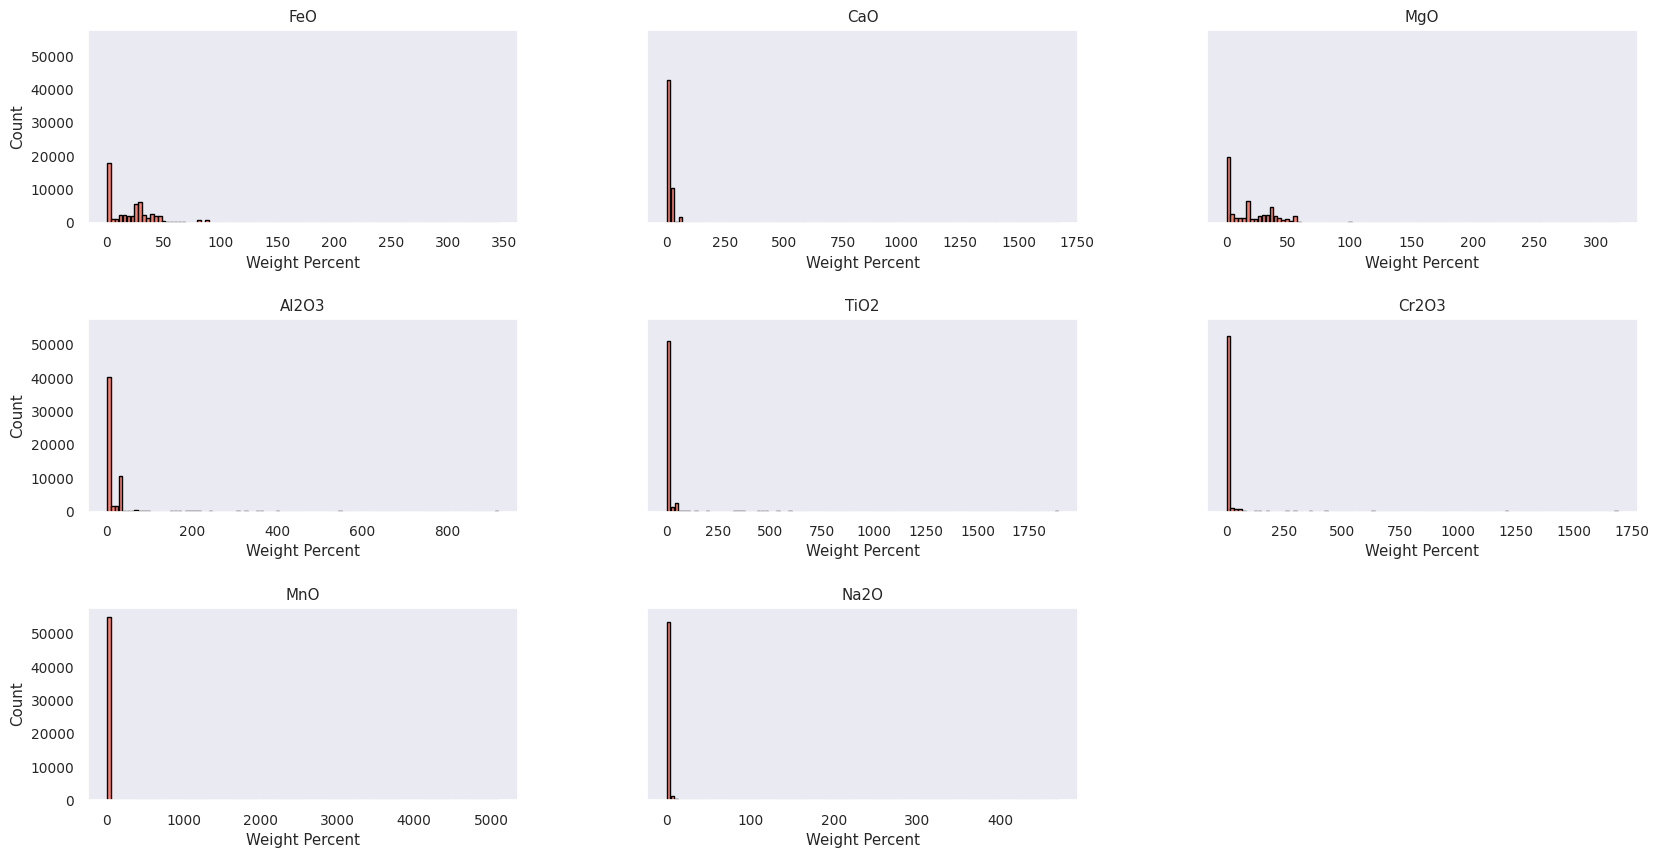

In [23]:
# Create a histogram of weight distribution counts for all samples
ax = df_filtered.hist(bins=100, grid=False, color='salmon', edgecolor='black', sharey=True, zorder=2, rwidth=0.9)
plt.subplots_adjust(hspace=0.5)
# Loop through the plots and add labels to x and y axes
for chart in ax.flatten():
    chart.set_xlabel("Weight Percent")
    chart.set_ylabel("Count")

### <p style="text-align:center;"><i>Figure 5: Examining the samples in the dataset displayed as histograms, the major minerals are mainly comprised of 4 different oxides, FeO, MgO, CaO, and Al2O3, with trace amounts of all the other compounds.</i></p>

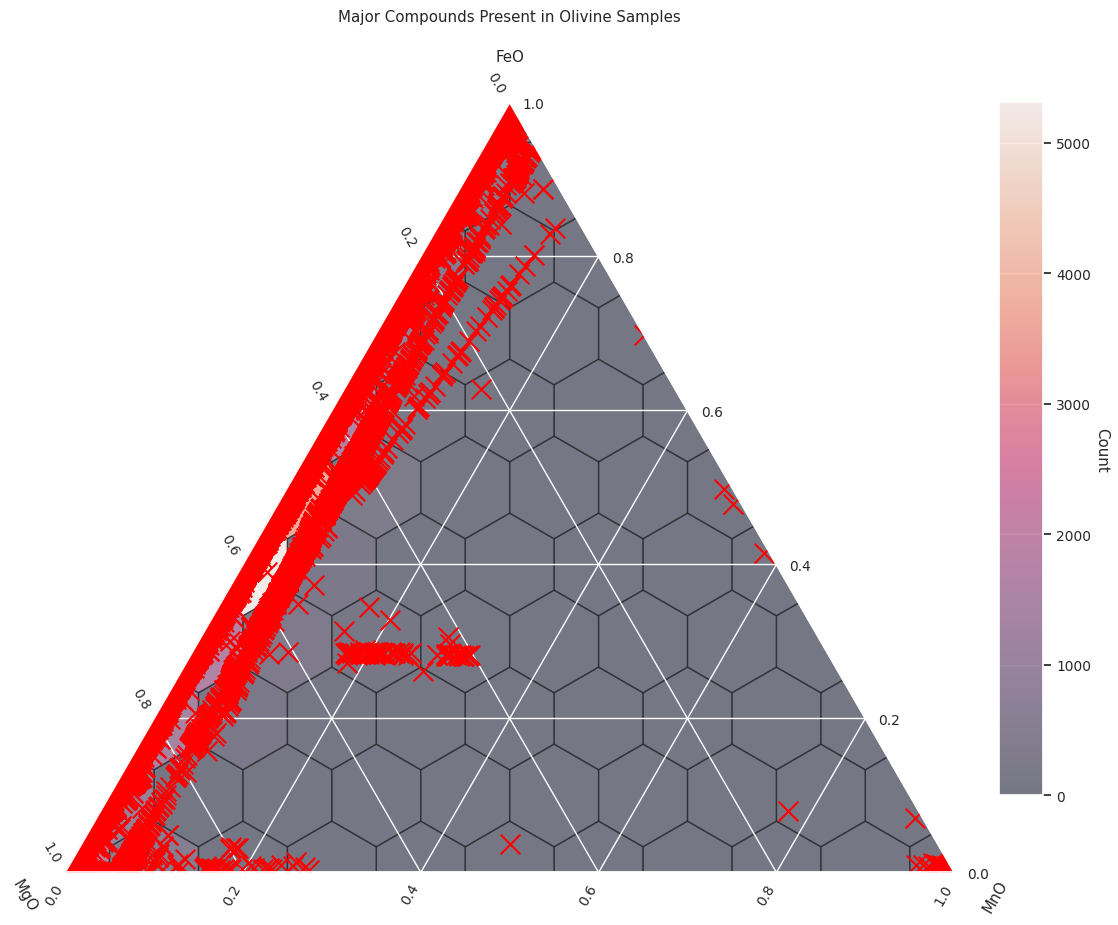

In [24]:
# Get just the olivine samples for plotting
df_olivine = df_filtered.loc[df_filtered['Mineral'] == 'OLIVINE']

# Declare a figure object
fig2 = plt.figure()
# Add the ternary projection
axes = fig2.add_subplot(projection="ternary")
# Create the scatterplot for the 3 major oxides
axes.scatter(df_olivine['FeO'], df_olivine['MgO'], df_olivine['MnO'], color="red", marker="x", s=200)
# Create the hexogonal bins on the plot
pc = axes.hexbin(df_olivine['FeO'], df_olivine['MgO'], df_olivine['MnO'], gridsize=10, edgecolors="k", alpha=0.5, zorder=0.0)
# Set the labels for each axis
axes.set_tlabel('FeO')
axes.set_llabel('MgO')
axes.set_rlabel('MnO')
# Add the title
axes.set_title('Major Compounds Present in Olivine Samples', pad=20)
# Insert gridlines
axes.grid(color='white')
cax = axes.inset_axes([1.05, 0.1, 0.05, 0.9], transform=axes.transAxes)
# Add the legend
colorbar = fig2.colorbar(pc, cax=cax)
colorbar.set_label("Count", rotation=270, va="baseline")

# Show the plot
plt.show()


### <p style="text-align:center;"><i>Figure 4: There are varying ratios of FeO and MgO in Lunar Olivine samples, perhaps dependent on the location where they were retrieved from.</i></p>

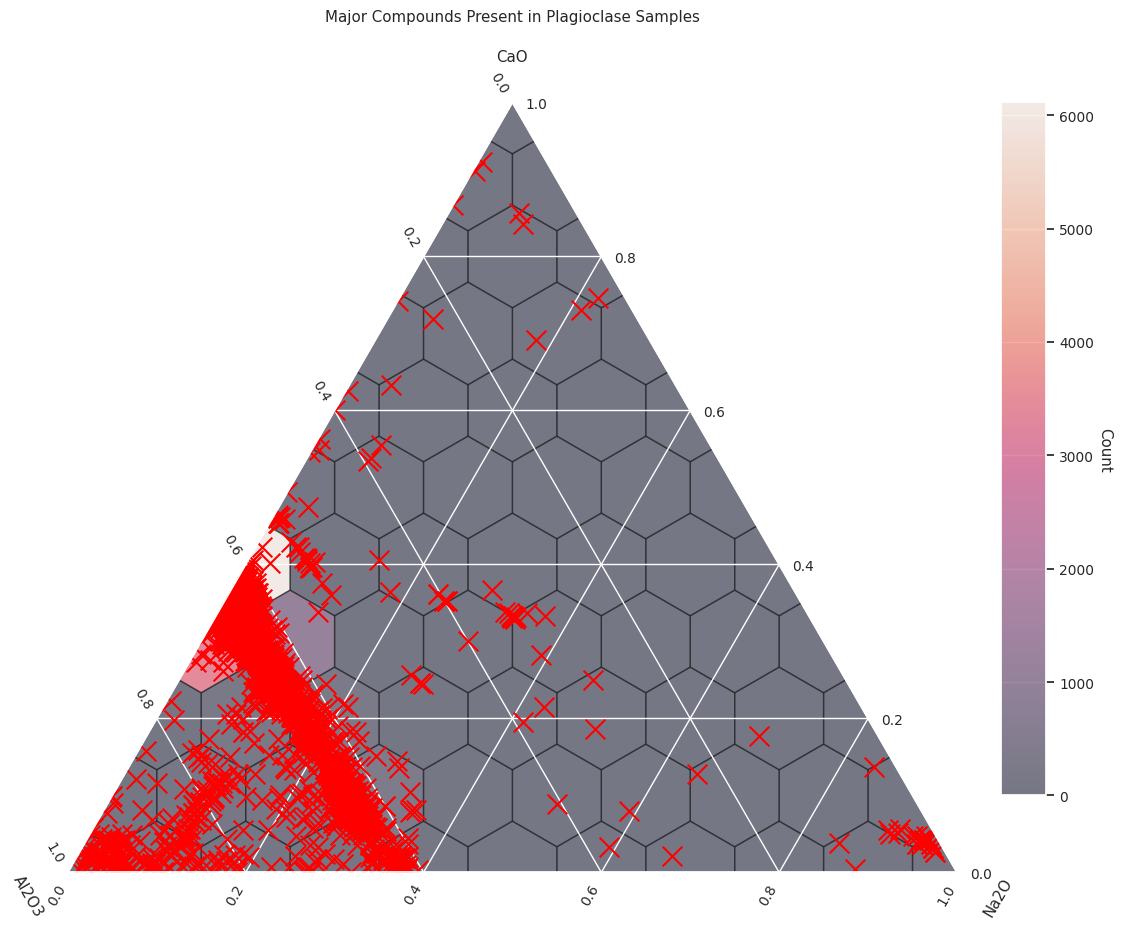

In [25]:
df_plagioclase = df_filtered.loc[df_filtered['Mineral'] == 'FELDSPAR']

# Declare a figure object
fig = plt.figure()
# Add the ternary projection
axes = fig.add_subplot(projection="ternary")
# Create the scatterplot for the 3 major oxides
axes.scatter(df_plagioclase['CaO'], df_plagioclase['Al2O3'], df_plagioclase['Na2O'], color="red", marker="x", s=200)
# Create the hexogonal bins on the plot
pc = axes.hexbin(df_plagioclase['CaO'], df_plagioclase['Al2O3'], df_plagioclase['Na2O'], gridsize=10, edgecolors="k", alpha=0.5, zorder=0.0)
# Set the labels for each axi
axes.set_tlabel('CaO')
axes.set_llabel('Al2O3')
axes.set_rlabel('Na2O')
# Add the title
axes.set_title('Major Compounds Present in Plagioclase Samples', pad=20)
# Insert gridlines
axes.grid(color='white')
cax = axes.inset_axes([1.05, 0.1, 0.05, 0.9], transform=axes.transAxes)
# Add the legend
colorbar = fig.colorbar(pc, cax=cax)
colorbar.set_label("Count", rotation=270, va="baseline")
# Show the plot
plt.show()

### <p style="text-align:center;"><i>Figure 5: Analyzing the 3 predominant oxides in Plagioclase, there is a bit more of a variance in the samples then was seen in the olivine samples in Figure 6</i></p>

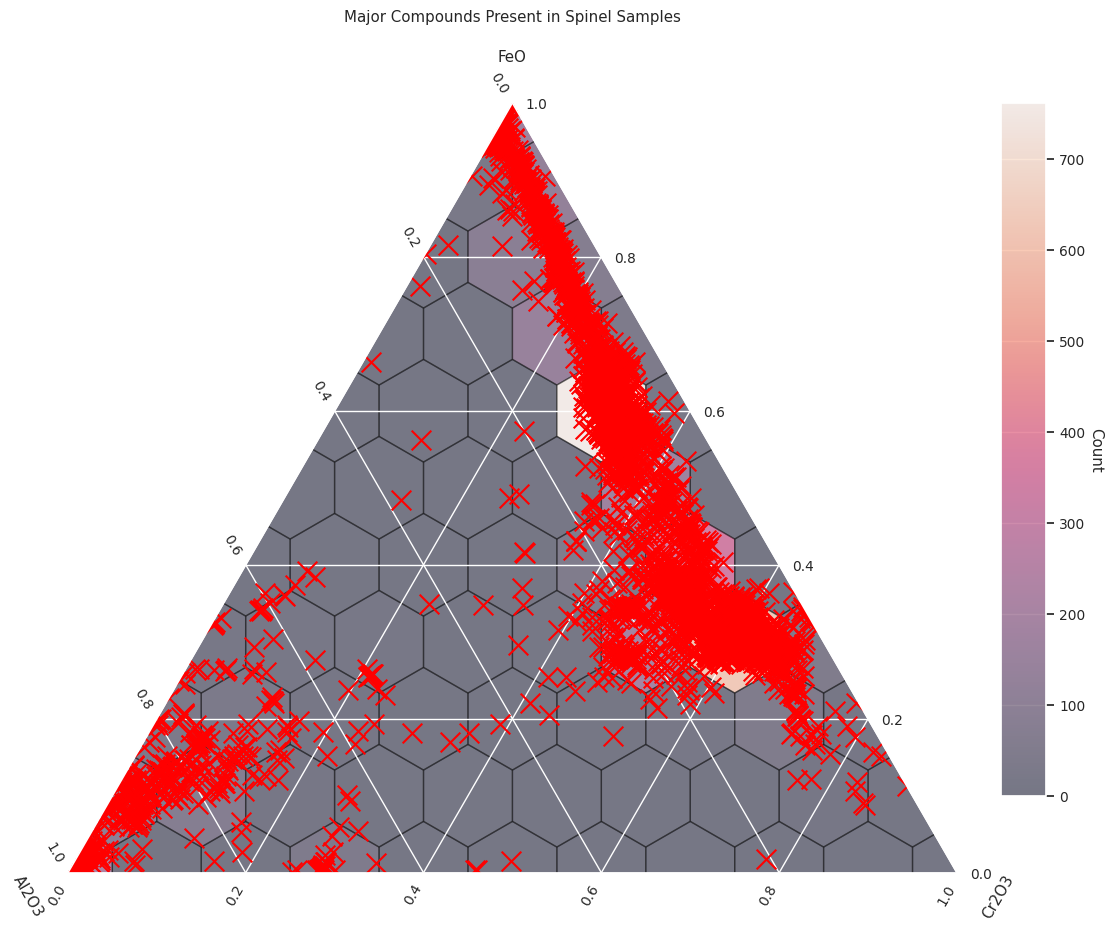

In [26]:
# Retrieve just the phyllosilicate mineral samples for plotting purposes
df_spinel = df_filtered.loc[df_filtered['Mineral'] == 'SPINEL']

# Declare a figure object
fig = plt.figure()
# Add the ternary projection
axes = fig.add_subplot(projection="ternary")
# Create the scatterplot for the 3 major oxides
axes.scatter(df_spinel['FeO'], df_spinel['Al2O3'], df_spinel['Cr2O3'], color="red", marker="x", s=200)
# Create the hexogonal bins on the plot
pc = axes.hexbin(df_spinel['FeO'], df_spinel['Al2O3'], df_spinel['Cr2O3'], gridsize=10, edgecolors="k", alpha=0.5, zorder=0.0)
# Set the labels for each axis
axes.set_tlabel('FeO')
axes.set_llabel('Al2O3')
axes.set_rlabel('Cr2O3')
# Add the title
axes.set_title('Major Compounds Present in Spinel Samples', pad=20)
# Insert gridlines
axes.grid(color="white")
cax = axes.inset_axes([1.05, 0.1, 0.05, 0.9], transform=axes.transAxes)
# Add the legend
colorbar = fig.colorbar(pc, cax=cax)
colorbar.set_label("Count", rotation=270, va="baseline")
# Show the plot
plt.show()

### <p style="text-align:center;"><i>Figure 6: Samples are agian kind of all over the map, but does seem like there is a high concentration in the cream colored bin in the above plot</i></p>

## Statistical Analysis

---



### To analyze the relationship between minerals and their constituent oxides, I decided to look at Q-Q and KDE plots. I also used Baumgartner-Weiss-Schindler (BWS) Tests to compare each mineral group to another to determine if they are statistically significant. Finally, I used Pearson correlation analysis to measures the relationship between the weight percentages of the oxides within a mineral group.

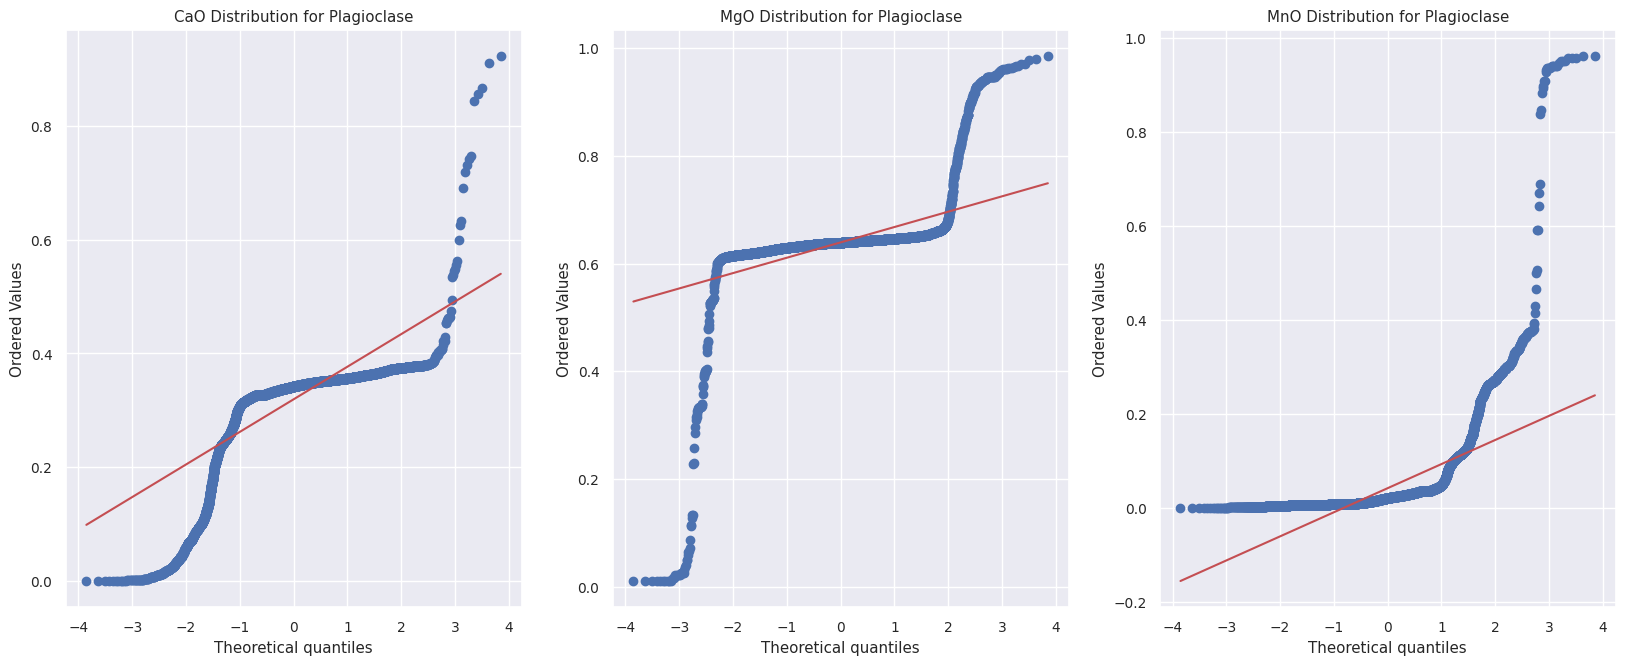

In [27]:
fig, ax = plt.subplots(1,3, figsize=[20,7.5])
stats.probplot(df_plagioclase['CaO'], plot=ax[0], dist='norm')
ax[0].set_title('CaO Distribution for Plagioclase')
stats.probplot(df_plagioclase['Al2O3'], plot=ax[1], dist='norm')
ax[1].set_title('MgO Distribution for Plagioclase')
stats.probplot(df_plagioclase['Na2O'], plot=ax[2], dist='norm')
ax[2].set_title('MnO Distribution for Plagioclase')
plt.show()

### <p style="text-align:center;"><i> Figure 7: The Q-Q plots above test if the CaO, MgO and MnO samples in the dolomite are normally distributed. Other than the outliers, they seem to fit the curves pretty well.</i></p>

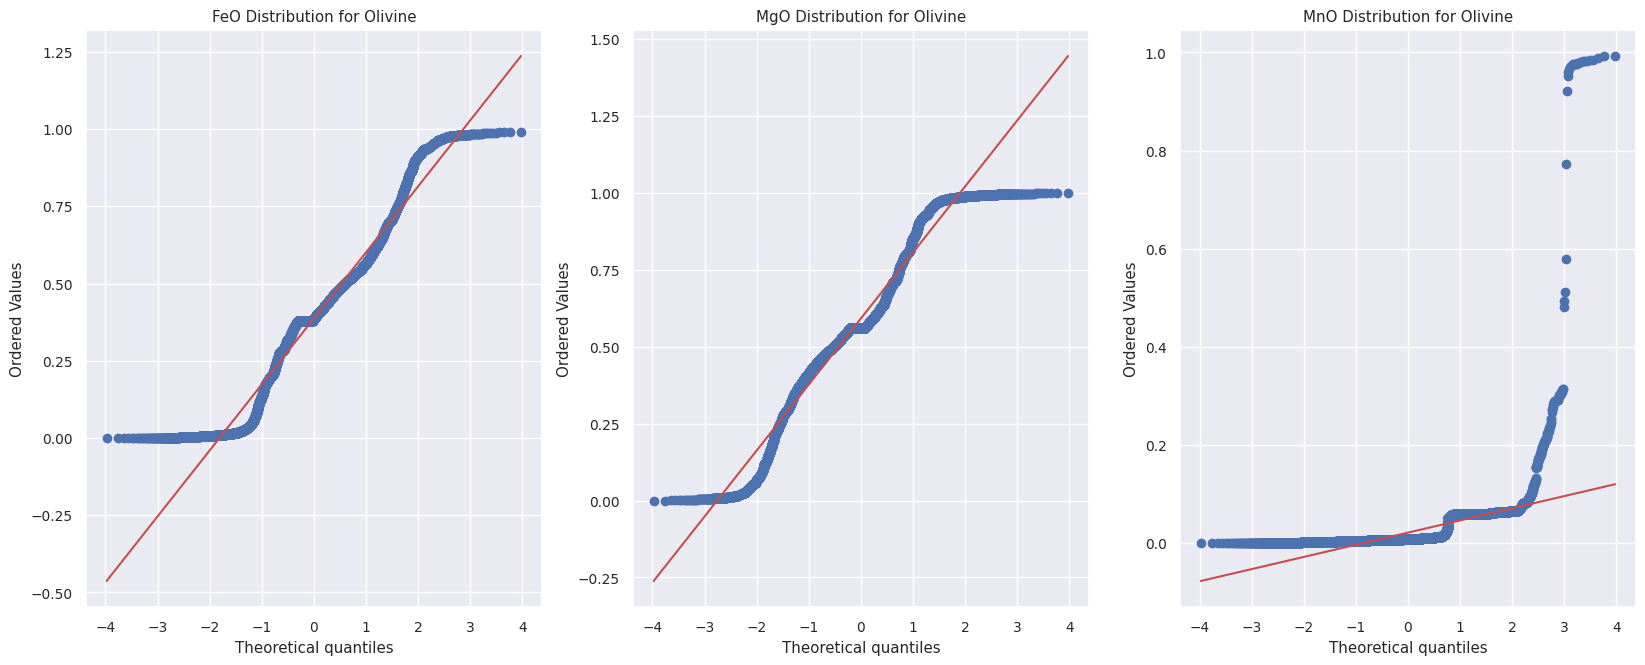

In [28]:
# Create the figure and the stats probplots
fig, ax = plt.subplots(1,3, figsize=[20,7.5])
stats.probplot(df_olivine['FeO'], plot=ax[0], dist='norm')
ax[0].set_title('FeO Distribution for Olivine')
stats.probplot(df_olivine['MgO'], plot=ax[1], dist='norm')
ax[1].set_title('MgO Distribution for Olivine')
stats.probplot(df_olivine['MnO'], plot=ax[2], dist='norm')
ax[2].set_title('MnO Distribution for Olivine')
plt.show()

### <p style="text-align:center;"> <i>Figure 8: The Q-Q plots above test if the FeO, MgO and MnO samples in the olivine are normally distributed. These plots show that the outliers are definitely skewing the plots. </i> </p>

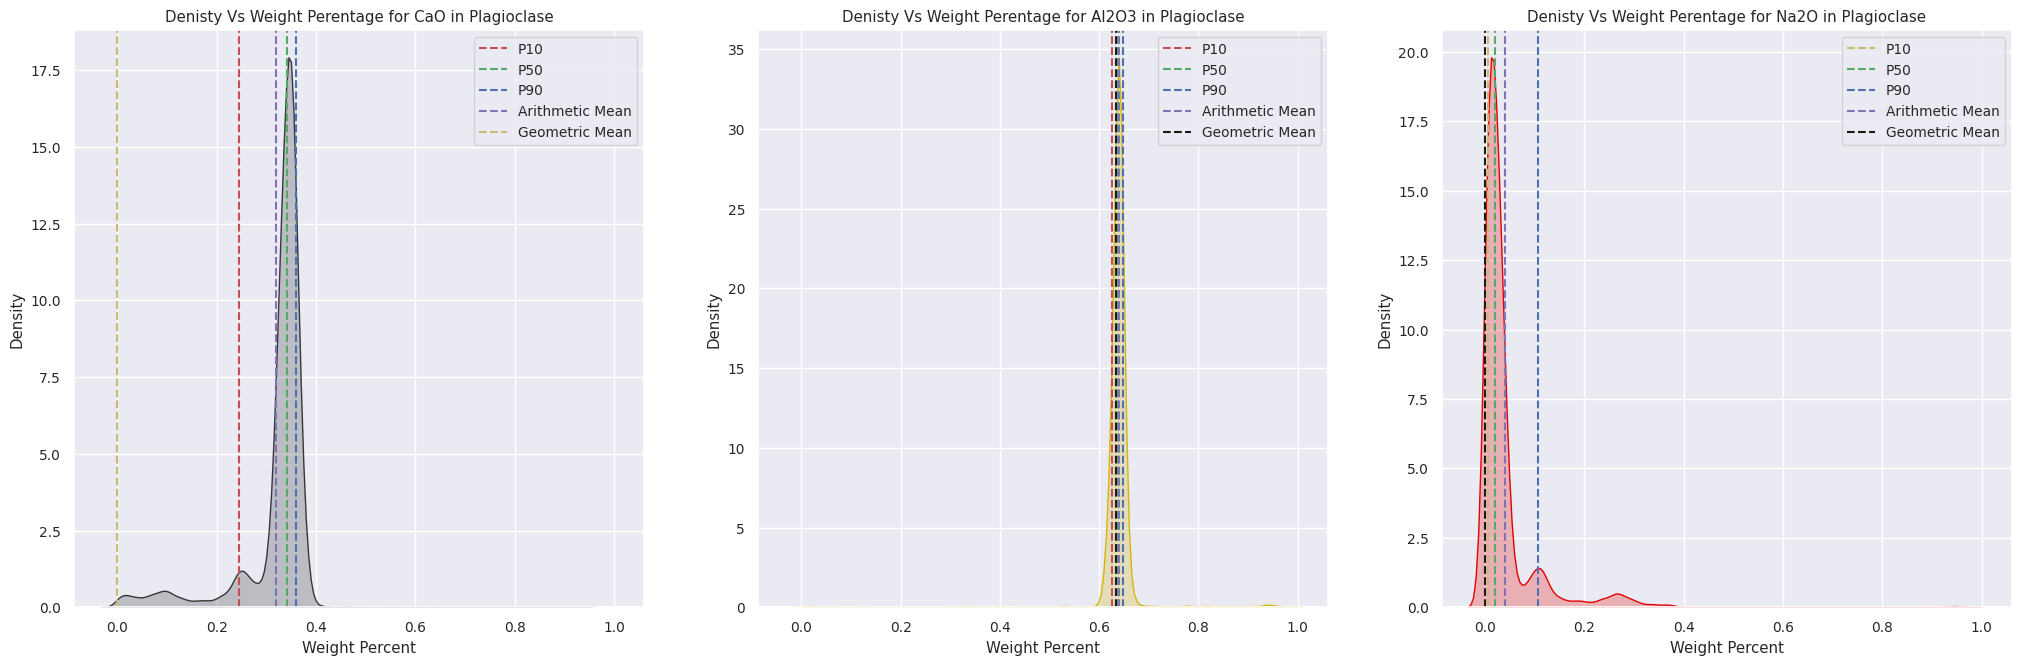

In [29]:
fig, [ax1, ax2, ax3] = plt.subplots(1,3, figsize=[25,7.5], sharex=True)

sns.kdeplot(df_plagioclase['CaO'],ax=ax1, color='xkcd:dark grey', fill=True)
sns.kdeplot(df_plagioclase['Al2O3'],ax=ax2, color='xkcd:dark yellow', fill=True)
sns.kdeplot(df_plagioclase['Na2O'],ax=ax3, color='xkcd:red', fill=True)

# Define a function to calculate the percentiles and means
def calc_means_percentiles(df, type):
    percentiles_and_means = [10,50,90,'arithmetic_mean','geometric_mean']
    dict = {}
    for value in percentiles_and_means:
        if value in [10,50,90]:
            dict[str(value)] = np.nanpercentile(df, value)
        if value == 'arithmetic_mean':
            dict[value] = round(np.mean(df),3)
        if value == 'geometric_mean':
             dict[value] = round(stats.gmean(df),3)
    return dict

# Create a dictionary for each oxides percentiles and means
ca_dict = calc_means_percentiles(df_plagioclase['CaO'], 'ca')
mg_dict = calc_means_percentiles(df_plagioclase['Al2O3'], 'al2o3')
mn_dict = calc_means_percentiles(df_plagioclase['Na2O'], 'nao2')

# Define a function to create the vertical lines for each plot for percentiles and means
def add_vertical_lines(compound_dict, ax, color1, color2):
    # Add vertical lines for percentiles
    ax.axvline(compound_dict['10'], color=color1, linestyle='--', label='P10')
    ax.axvline(compound_dict['50'], color='g', linestyle='--', label='P50')
    ax.axvline(compound_dict['90'], color='b', linestyle='--', label='P90')
    ax.axvline(compound_dict['arithmetic_mean'], color='m', linestyle='--', label='Arithmetic Mean')
    ax.axvline(compound_dict['geometric_mean'], color=color2, linestyle='--', label='Geometric Mean')

# Call the function above
add_vertical_lines(ca_dict, ax1, 'r', 'y')
add_vertical_lines(mg_dict, ax2, 'r', 'k')
add_vertical_lines(mn_dict, ax3, 'y', 'k')

def add_legend_and_title(ax, title):
    # Add legend
    ax.legend()
    ax.set_xlabel("Weight Percent")
    ax.set_title(title)

# Call the legend and title function
add_legend_and_title(ax1, "Denisty Vs Weight Perentage for CaO in Plagioclase")
add_legend_and_title(ax2, "Denisty Vs Weight Perentage for Al2O3 in Plagioclase")
add_legend_and_title(ax3, "Denisty Vs Weight Perentage for Na2O in Plagioclase")

# Show the plot
plt.show()


### <p style="text-align:center;"><i>Figure 9: KDE plots for 3 oxides in dolomite samples. The means and P50 for each oxide are all relatively close together, almost overlapping.</i></p>

/usr/local/lib/python3.11/dist-packages/scipy/stats/_stats_py.py:208: RuntimeWarning: invalid value encountered in log
  log_a = np.log(a)


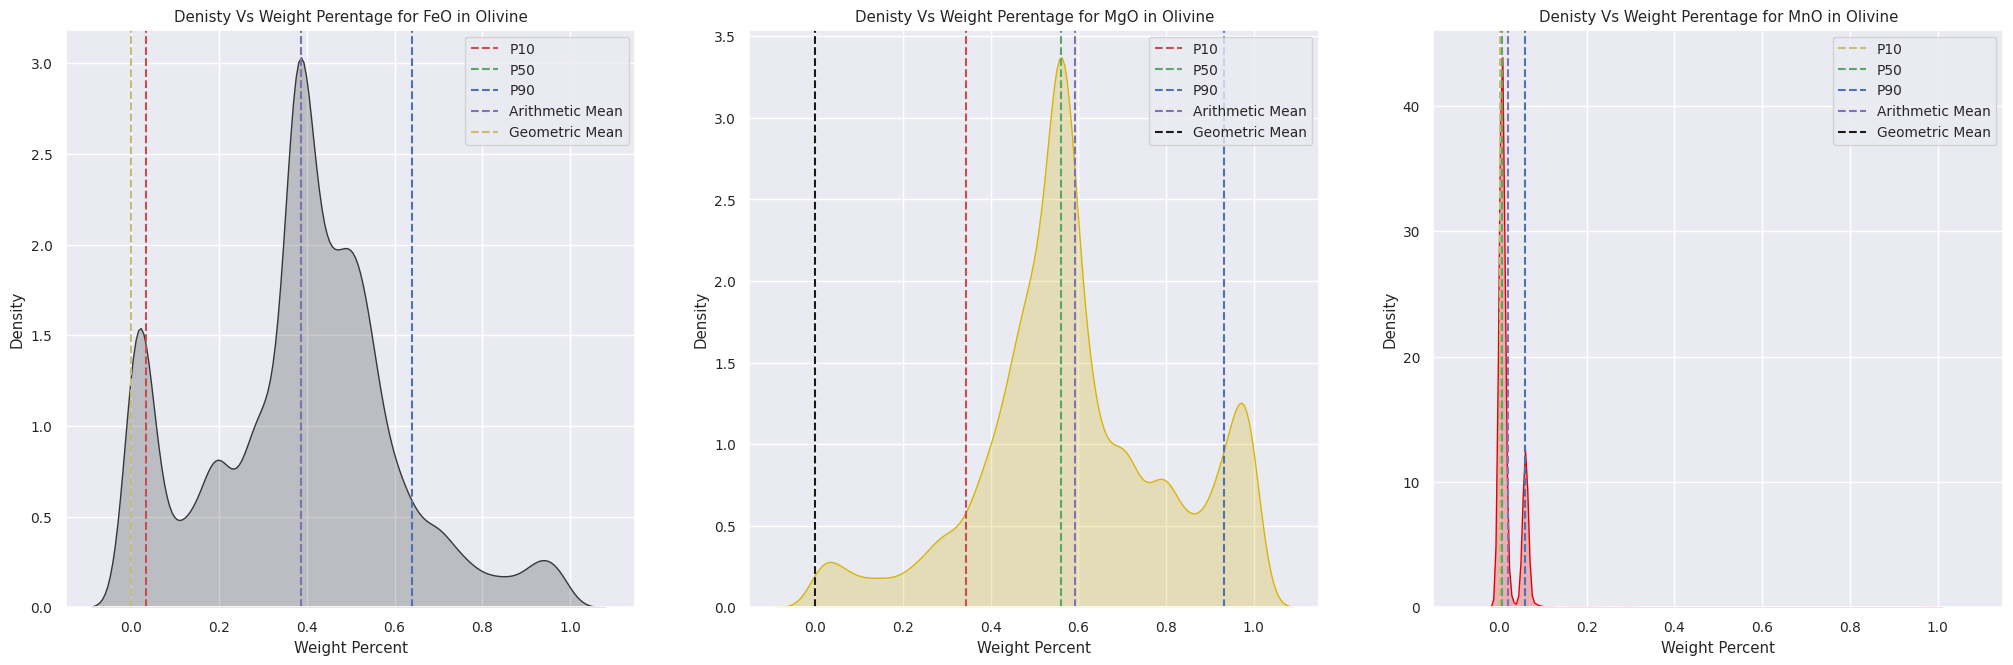

In [30]:
fig, [ax1, ax2, ax3] = plt.subplots(1,3, figsize=[25,7.5], sharex=True)

sns.kdeplot(df_olivine['FeO'],ax=ax1, color='xkcd:dark grey', fill=True)
sns.kdeplot(df_olivine['MgO'],ax=ax2, color='xkcd:dark yellow', fill=True)
sns.kdeplot(df_olivine['MnO'],ax=ax3, color='xkcd:red', fill=True)

# Define a function to calculate the percentiles and means
def calc_means_percentiles(df, type):
    percentiles_and_means = [10,50,90,'arithmetic_mean','geometric_mean']
    dict = {}
    for value in percentiles_and_means:
        if value in [10,50,90]:
            dict[str(value)] = np.percentile(df, value)
        if value == 'arithmetic_mean':
            dict[value] = round(np.mean(df),3)
        if value == 'geometric_mean':
             dict[value] = round(stats.gmean(df),3)
    return dict

# Create a dictionary for each oxides percentiles and means
fe_dict = calc_means_percentiles(df_olivine['FeO'], 'fe')
mg_dict = calc_means_percentiles(df_olivine['MgO'], 'mg')
mn_dict = calc_means_percentiles(df_olivine['MnO'], 'mn')

# Define a function to create the vertical lines for each plot for percentiles and means
def add_vertical_lines(compound_dict, ax, color1, color2):
    # Add vertical lines for percentiles
    ax.axvline(compound_dict['10'], color=color1, linestyle='--', label='P10')
    ax.axvline(compound_dict['50'], color='g', linestyle='--', label='P50')
    ax.axvline(compound_dict['90'], color='b', linestyle='--', label='P90')
    ax.axvline(compound_dict['arithmetic_mean'], color='m', linestyle='--', label='Arithmetic Mean')
    ax.axvline(compound_dict['geometric_mean'], color=color2, linestyle='--', label='Geometric Mean')

# Call the function above
add_vertical_lines(fe_dict, ax1, 'r', 'y')
add_vertical_lines(mg_dict, ax2, 'r', 'k')
add_vertical_lines(mn_dict, ax3, 'y', 'k')

def add_legend_and_title(ax, title):
    # Add legend
    ax.legend()
    ax.set_xlabel("Weight Percent")
    ax.set_title(title)

# Call the legend and title function
add_legend_and_title(ax1, "Denisty Vs Weight Perentage for FeO in Olivine")
add_legend_and_title(ax2, "Denisty Vs Weight Perentage for MgO in Olivine")
add_legend_and_title(ax3, "Denisty Vs Weight Perentage for MnO in Olivine")

# Show the plot
plt.show()


### <p style="text-align:center;"><i>Figure 10: KDE plots for 3 oxides in olivine samples. As pointed out in the ternary plot in figure 6, the bumps that appear outside of the main distribution could be from different lunar locations.</i></p>

In [31]:
%%time
# Create a list of oxides to test, focusing on
oxides_to_test =[col for col in df.columns if col != 'Mineral']
# Loop through the oxides and perform the

for oxide in oxides_to_test:
    res = stats.bws_test(df_spinel[oxide], df_plagioclase[oxide])
    print(f"The p-value score for comparing {oxide} values in spinel vs plagioclase is: {res.pvalue}")

The p-value score for comparing FeO values in spinel vs plagioclase is: 0.0001
The p-value score for comparing CaO values in spinel vs plagioclase is: 0.0001
The p-value score for comparing MgO values in spinel vs plagioclase is: 0.0001
The p-value score for comparing Al2O3 values in spinel vs plagioclase is: 0.0001
The p-value score for comparing TiO2 values in spinel vs plagioclase is: 0.0001
The p-value score for comparing Cr2O3 values in spinel vs plagioclase is: 0.0001
The p-value score for comparing MnO values in spinel vs plagioclase is: 0.0001
The p-value score for comparing Na2O values in spinel vs plagioclase is: 0.0001
CPU times: user 1min 41s, sys: 15.2 s, total: 1min 56s
Wall time: 1min 56s


### Comparing the oxides in spinel and plagioclase using a Baumgartner-Weiss-Schindler (BWS) Test, most oxides have an extremly low pvalue.This means that the null hypothesis for the majority of the oxides is rejected as the samples from the 2 minerals are significantly different. This is good from a classification standpoint.



In [32]:
%%time
df_ilmenite = df_filtered.loc[df_filtered['Mineral'] == 'ILMENITE']

# Loop through the oxides and perform the
for oxide in oxides_to_test:
    res = stats.bws_test(df_ilmenite[oxide], df_spinel[oxide])
    print(f"The p-value score for comparing {oxide} values in ilmenite vs spinel is: {res.pvalue}")

The p-value score for comparing FeO values in ilmenite vs spinel is: 0.0001
The p-value score for comparing CaO values in ilmenite vs spinel is: 0.0001
The p-value score for comparing MgO values in ilmenite vs spinel is: 0.0001
The p-value score for comparing Al2O3 values in ilmenite vs spinel is: 0.0001
The p-value score for comparing TiO2 values in ilmenite vs spinel is: 0.0001
The p-value score for comparing Cr2O3 values in ilmenite vs spinel is: 0.0001
The p-value score for comparing MnO values in ilmenite vs spinel is: 0.0001
The p-value score for comparing Na2O values in ilmenite vs spinel is: 0.0001
CPU times: user 40 s, sys: 5.37 s, total: 45.3 s
Wall time: 45.3 s


In [38]:
%%time
df_high_ca = df_filtered.loc[df_filtered['Mineral'] == 'AUGITE']
df_low_ca = df_filtered.loc[df_filtered['Mineral'] == 'PIGEONITE']

# Loop through the oxides and perform the
for oxide in oxides_to_test:
    res = stats.bws_test(df_high_ca[oxide], df_low_ca[oxide])
    print(f"The p-value score for comparing {oxide} values in ilmenite vs spinel is: {res.pvalue}")

The p-value score for comparing FeO values in ilmenite vs spinel is: 0.0001
The p-value score for comparing CaO values in ilmenite vs spinel is: 0.0001
The p-value score for comparing MgO values in ilmenite vs spinel is: 0.0001
The p-value score for comparing Al2O3 values in ilmenite vs spinel is: 0.0001
The p-value score for comparing TiO2 values in ilmenite vs spinel is: 0.0001
The p-value score for comparing Cr2O3 values in ilmenite vs spinel is: 0.0001
The p-value score for comparing MnO values in ilmenite vs spinel is: 0.0001
The p-value score for comparing Na2O values in ilmenite vs spinel is: 0.0001
CPU times: user 10.9 s, sys: 1.19 s, total: 12.1 s
Wall time: 12.1 s


### Analyzing the oxides in ilmenite vs spinel again using a Baumgartner-Weiss-Schindler (BWS) Test, there are again low pvalue scores. The null hypothesis for the oxides is rejected as the oxides appear to be significantly different.

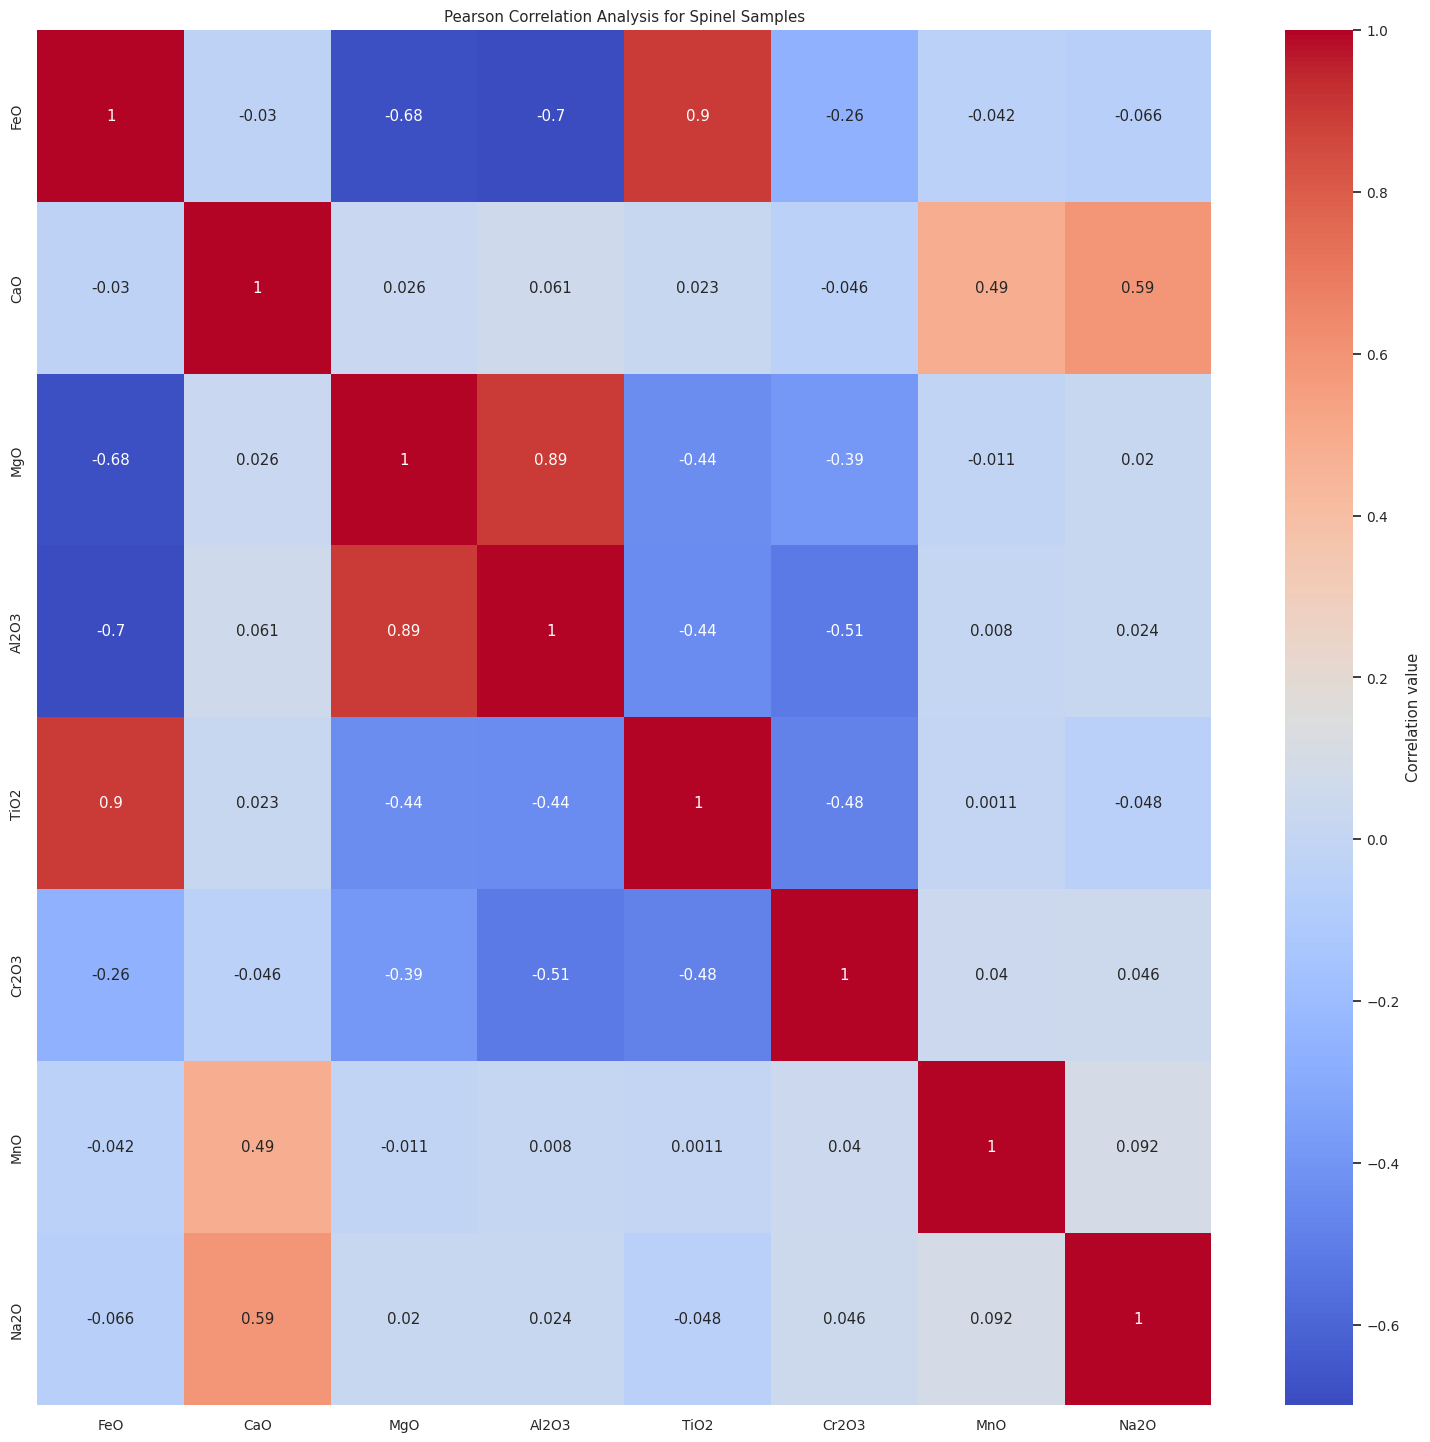

In [39]:
# Drop the Mineral column
df_spinel_rm = df_spinel.drop(['Mineral'], axis=1)

fig, ax = plt.subplots(figsize=[15, 15], sharex=True)

# Calculate the correlation matrix, dropping all NaN rows and columns
correlation_matrix = df_spinel_rm.corr(method='pearson').dropna(axis=0, how='all').dropna(axis=1, how='all')

# Plot the results of the correlation as a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', cbar_kws={'label': 'Correlation value'})
plt.title("Pearson Correlation Analysis for Spinel Samples")
ax.set_position([0.55, 0.1, 0.35, 0.8])  # Adjust position manually

plt.tight_layout()
plt.show()


### <p style="text-align:center;"><i>Figure 11: Interrelationships in dolomite were assessed by Pearson correlation analysis. Multiple moderate correlations were observed. A strong correlation was observed between FeO and TiO2 as well as MgO and Al2O3</i></p>

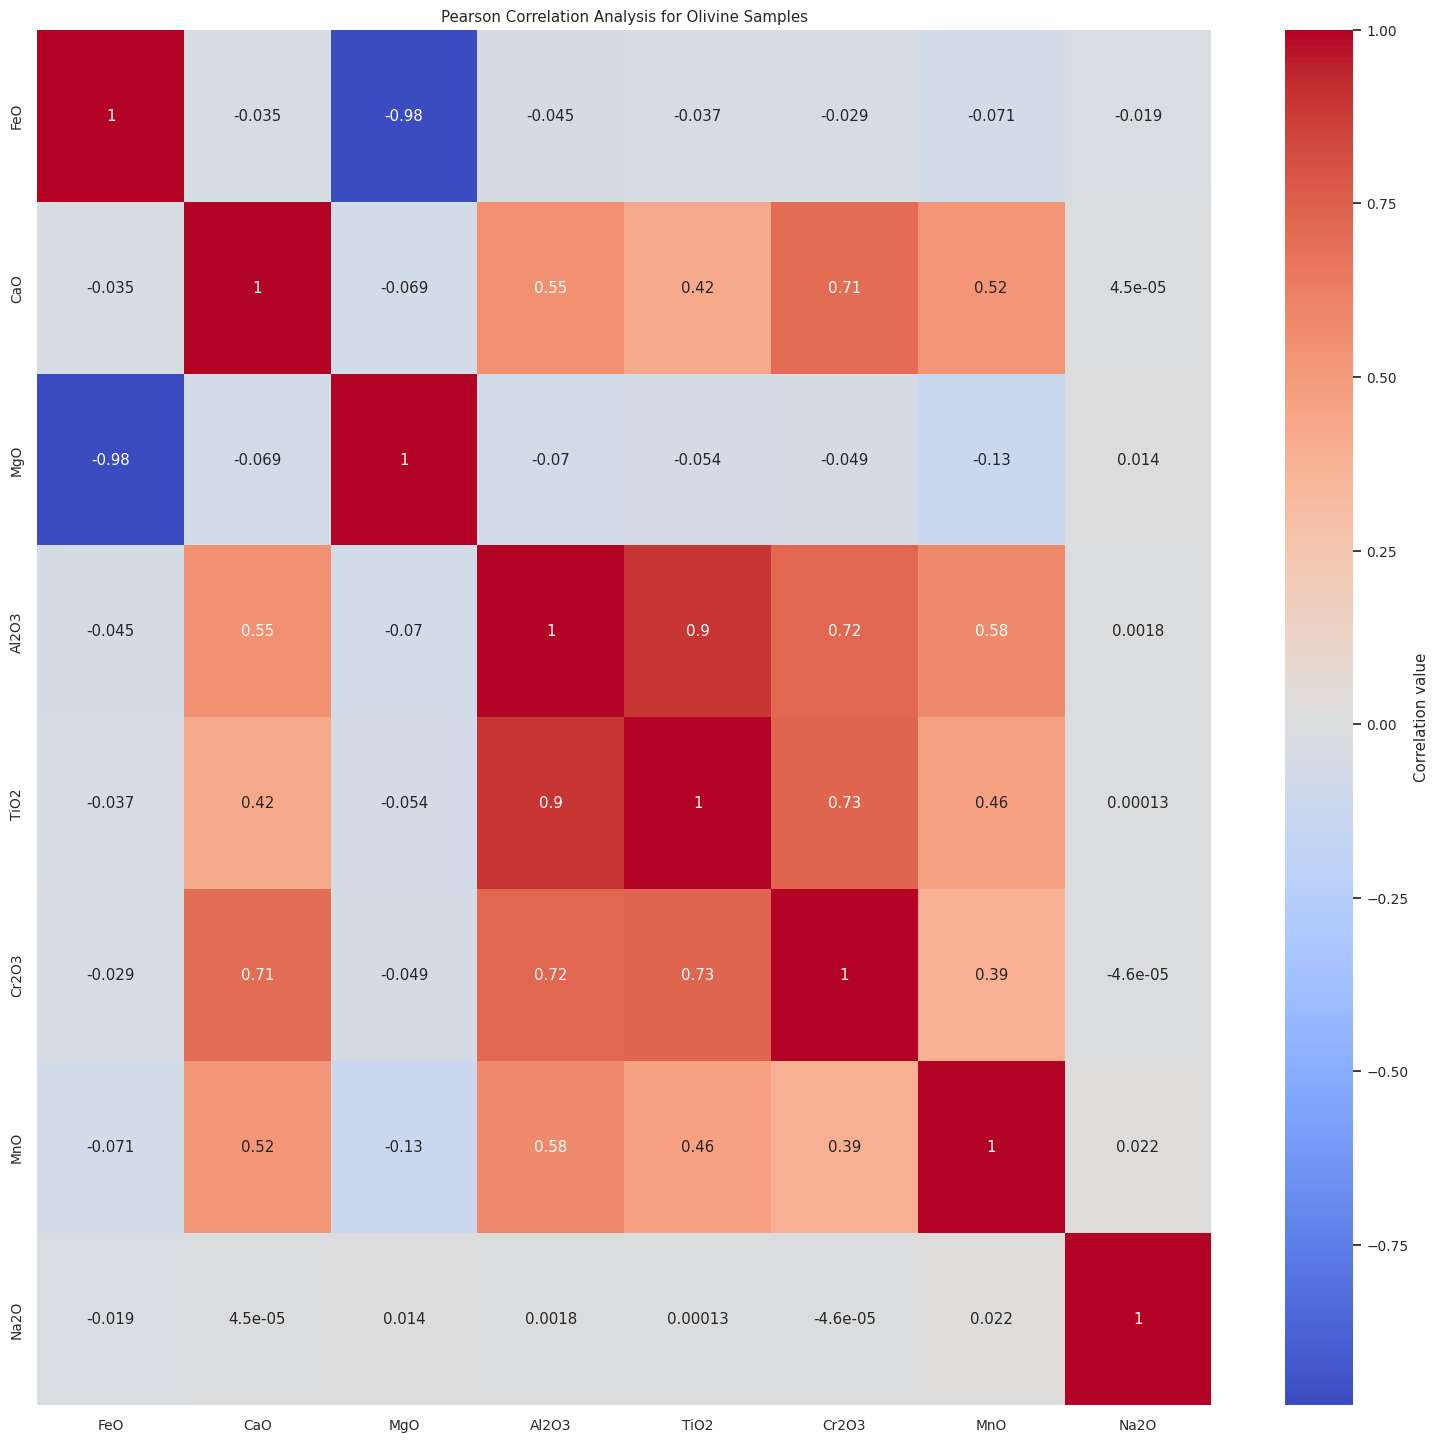

In [40]:
# Drop the Mineral column
df_olivine_rm = df_olivine.drop(['Mineral'], axis=1)

fig, ax = plt.subplots(figsize=[15, 15], sharex=True)

# Calculate the correlation matrix, dropping all NaN rows and columns
correlation_matrix = df_olivine_rm.corr(method='pearson').dropna(axis=0, how='all').dropna(axis=1, how='all')

# Plot the results of the correlation as a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', cbar_kws={'label': 'Correlation value'})
plt.title("Pearson Correlation Analysis for Olivine Samples")
ax.set_position([0.55, 0.1, 0.35, 0.8])  # Adjust position manually

plt.tight_layout()
plt.show()

### <p style="text-align:center;"><i>Figure 12: Interrelationships in olivine were also assessed by Pearson correlation analysis. There is a strong negative correlation discovered between FeO and MgO (-0.99)</i></p>

## Results

---



### &emsp; I discovered that there was a fair amount of missing data after cleaning. Although I performed data imputation, I'm not necessarily satisfied with the results and may utilize another method to handle missing values.

### Despite this, for the non-parametric Baumgartner-Weiss-Schindler (BWS) hypothesis tests indicates strong evidence against the null hypothesis, suggesting that the groups being compared are likely different in their distributions. I believe this appears to be promising from a classification standpoint.

### The original data set has 83,827 samples and after cleaning there are 66,709. The biggest problem I see now is the class imbalance between the dominant classes from a distribution standpoint and the rest of the classes. I am already considering solutions including oversampling and possibly data augmentation. I would not consider this "big data", as there is well under a million records.

### I think I am on track to be able to standardize this data set, split into train, validation and test sets and train various models. I am considering using a neural network and XGBoost. I haven't determined the 3rd algorithm I wish to use yet.

## References


---


### https://www.skyatnightmagazine.com/advice/skills/see-apollo-landing-sites-moon

In [41]:
df_filtered.to_csv('new_lunar_info.csv', index=False)